In [1]:
def get_map(df,df_maps,variavel,ano='last'):
    mask = (df['variavel']==variavel) & (df['mesoregiao'].notnull())
    df_test = df[mask]
    
#     df_test['dado'] = df_test['dado'].str.replace('-','000')
    df_test['dado'] = np.where(df_test['dado']=='-', np.nan,df_test['dado'])
    df_test['dado'] = df_test['dado'].astype(float)

    if ano == 'last':
        last_year = max(df_test['ano'])
    else:
        last_year = ano
    
    
    mask = (df_test['ano']==last_year)
    df_test = df_test[mask]
    
    
    df_test = pd.merge(df_test, df_maps, on='localidade', how='inner')
    
    
    
    mask = (df['variavel']=='População') & (df['mesoregiao'].notnull())
    df_pop = df[mask]
    mask = (df_pop['ano']==last_year)
    df_pop = df_pop[mask]
    df_pop['dado'] = np.where(df_pop['dado']=='-', np.nan,df_pop['dado'])
    df_pop['dado'] = df_pop['dado'].astype(float)
    df_pop = df_pop[['localidade','dado']].rename(columns={'dado':'populacao'})
    
    
    df_test = pd.merge(df_test, df_pop, on='localidade', how='inner')
    df_test['dado_pop'] = df_test['dado']/df_test['populacao']
    
    df_test = gpd.GeoDataFrame(df_test)
    
    df_test = df_test.sort_values(by='dado',ascending=False)
    
    return(df_test)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:


# IMPORT CONFIGs
import os
import sys
sys.path.insert(0, '../')
sys.path.insert(0, '../scripts')
from config import RAW_PATH, TREAT_PATH, OUTPUT_PATH


# DATA ANALYSIS & VIZ TOOLS
from copy import deepcopy

import pandas as pd
import geopandas as gpd
pd.options.display.max_columns = 999

#import plotly
#import plotly.graph_objs as go
#import plotly.offline as offline
#offline.init_notebook_mode(connected=True)


from mpl_toolkits.axes_grid1 import make_axes_locatable
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 12)


# For changes in .py
%reload_ext autoreload
%autoreload 2



import numpy as np


import missingno as msno

stats = ['skew', 'mad', 'kurt']


import qgrid

def qg(df):
    return(qgrid.show_grid(df,show_toolbar=True, grid_options={'forceFitColumns': False}))

import itertools
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', -1)
pd.set_option('display.max_colwidth', 100)

import requests
import json
import xmltodict
import re
import urllib.request as urllib2
import io
import yaml

import math
import pysal as ps

from pysal.esda.mapclassify import Quantiles, Equal_Interval, Fisher_Jenks

Populating the interactive namespace from numpy and matplotlib


### Import Data

In [4]:
df = pd.read_csv('dados/base_consolidada_final.csv', encoding='utf-8')
df.shape

(13972781, 13)

In [35]:
df_maps = gpd.read_file('maps/municipios_meso_micro.shp', encoding='utf-8')

In [36]:
cols = ['localidade','geometry']
df_maps = df_maps[cols]

In [38]:
### Codigo de SJ dos Campos 499
mask = df['codigo_localidade']==499

df_sjc = df[mask]


# cols = ['variavel','unidade','periodo']
# variaveis = df_sjc[cols].drop_duplicates()
# variaveis.to_excel('lista_de_indicadores.xlsx', index=False, encoding='utf-8')

In [101]:
var = 'Casamentos'

df_test = get_map(df=df, variavel =  var, df_maps=df_maps, ano='last')

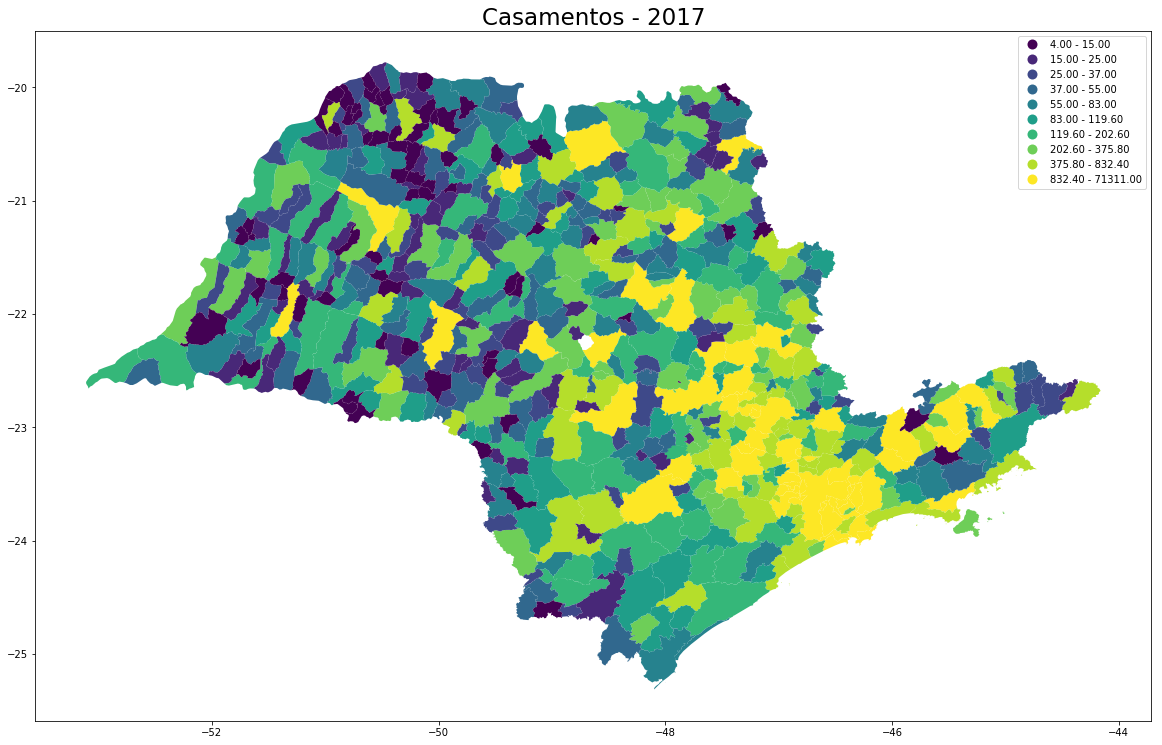

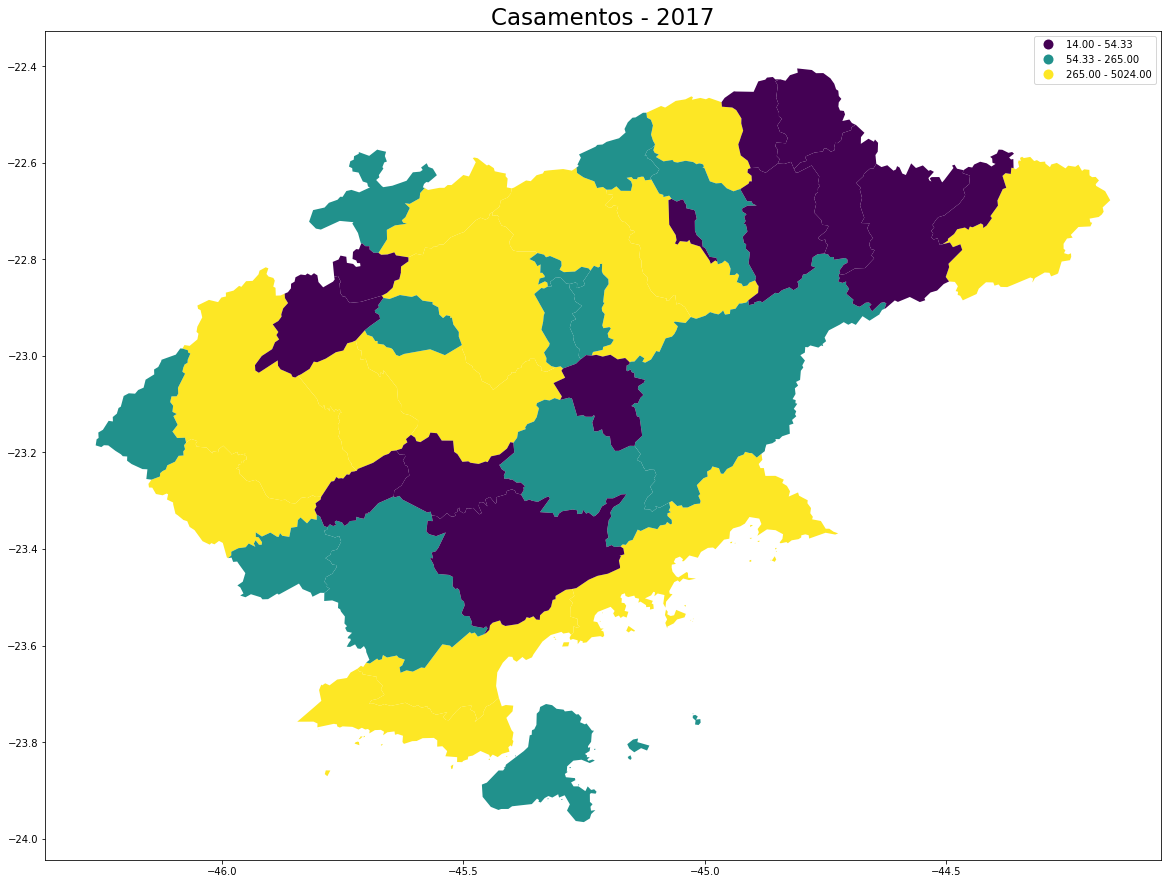

In [102]:
###--------SP--------###
fig = plt.figure(figsize=(20,20))
ax  = fig.add_subplot(1,1,1)
divider = make_axes_locatable(ax)

ax.set_title('{} - {}'.format(var,df_test['ano'].unique()[0]), fontsize=23)
df_test = df_test[df_test['dado'].notnull()]
# df_test['dado']=df_test['dado'].fillna(-1)
# df_test['dado'] = np.log(df_test['dado'])



df_test.plot(column='dado' ,scheme='QUANTILES', k=10, ax=ax, legend=True)

# cax = divider.append_axes("right", size="5%", pad=0.1)
# df_test.plot(column='dado', ax=ax, legend=True,cax=cax)



# plt.legend(format='%.0e')

###--------VALE--------###

fig = plt.figure(figsize=(20,20))
ax  = fig.add_subplot(1,1,1)
divider = make_axes_locatable(ax)
ax.set_title('{} - {}'.format(var,df_test['ano'].unique()[0]), fontsize=23)
mask = (df_test['mesoregiao']=='VALE DO PARAIBA PAULISTA') 
# & (df_test['dado'].notnull())

df_test[mask].plot(column='dado', scheme='QUANTILES', k=3, ax=ax, legend=True)

# cax = divider.append_axes("right", size="5%", pad=0.1)
# df_test[mask].plot(column='dado', ax=ax, legend=True, cax=cax)

# plt.legend(format='%.0e')

In [45]:
df_test[mask].groupby(by='nome_localidade_pai').sum()

,ano,codigo_localidade,codigo_variavel,loc,year,dado
nome_localidade_pai,,,,,,
Região de Governo de Caraguatatuba,8076,1370,220,1370,8076,321346.0
Região de Governo de Cruzeiro,16152,2494,440,2494,16152,126421.0
Região de Governo de Guaratinguetá,18171,2770,495,2770,18171,343136.0
Região de Governo de São José dos Campos,16152,2412,440,2412,16152,1071973.0
Região de Governo de Taubaté,20190,4042,550,4042,20190,605091.0


## ICMS

In [4]:
df = pd.read_excel('dados/icms.xlsx')

In [6]:
df.tail(50)

,city_code,city_name,year,meses,icms,ipva,fund_exp_ipi,comp,total,data_de_captura
191944,7742,Zacarias,2015,Setembro,484726.23,7251.04,3479.46,2059.28,497516.01,2019-10-13 04:52:03.094697
191945,7742,Zacarias,2015,Outubro,428934.58,8584.56,3777.60,1820.10,443116.84,2019-10-13 04:52:03.094697
191946,7742,Zacarias,2015,Novembro,367260.29,7441.12,3562.72,1988.46,380252.59,2019-10-13 04:52:03.094697
191947,7742,Zacarias,2015,Dezembro,581919.09,10551.46,3445.13,2044.22,597959.90,2019-10-13 04:52:03.094697
191948,7742,Zacarias,2016,Janeiro,449575.30,105049.23,3731.07,1505.95,559861.55,2019-10-13 04:52:03.074801
191949,7742,Zacarias,2016,Fevereiro,325956.70,51282.27,3047.71,1379.59,381666.27,2019-10-13 04:52:03.074801
191950,7742,Zacarias,2016,Março,549024.20,38022.24,2915.74,1342.69,591304.87,2019-10-13 04:52:03.074801
191951,7742,Zacarias,2016,Abril,403195.06,9413.20,2765.19,1170.06,416543.51,2019-10-13 04:52:03.074801
191952,7742,Zacarias,2016,Maio,497680.17,8674.36,3442.73,1507.16,511304.41,2019-10-13 04:52:03.074801
191953,7742,Zacarias,2016,Junho,376740.83,14351.42,2066.27,1620.89,394779.41,2019-10-13 04:52:03.074801


In [ ]:
# cmaps = {'Perceptually Uniform Sequential': ['viridis', 'plasma', 'inferno', 'magma'],
#          'Sequential'                     :['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds','YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu','GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'],
#          'Sequential_2': ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink','spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia','hot', 'afmhot', 'gist_heat', 'copper'],
#          'Diverging': ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu','RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'],
#          'Qualitative': ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c'],
#          'Miscellaneous': ['flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv','gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar']
#         }

# op = list(cmaps.keys())

In [ ]:
# classi = ps.esda.mapclassify.Fisher_Jenks(df_test['dado'], k=7)


In [ ]:
# # Set up the figure
# f, ax = plt.subplots(1)
# # Plot the kernel density estimation (KDE)
# sns.kdeplot(df_test['dado'], shade=True)
# # Add a blue tick for every value at the bottom of the plot (rugs)
# sns.rugplot(df_test['dado'], alpha=0.5)
# # Loop over each break point and plot a vertical red line
# for cut in classi.bins:
#     plt.axvline(cut, color='red', linewidth=0.75)
# # Display image
# plt.show()